<h2>Basic Data mining technique Data mining Practice and Theory<h2>


In [26]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_roc_curve, RocCurveDisplay
from sklearn.linear_model import RidgeClassifier
from yellowbrick.classifier import ROCAUC

In [27]:
df = pd.read_csv('ODI_2022.csv','r',delimiter = ';')

In [28]:
df.head()

,Tijdstempel,What programme are you in?,Have you taken a course on machine learning?,Have you taken a course on information retrieval?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?,Chocolate makes you.....,When is your birthday (date)?,Number of neighbors sitting around you?,Did you stand up?,What is your stress level (0-100)?,"You can get 100 euros if you win a local DM competition, or we don’t hold any competitions and I give everyone some money (not the same amount!). How much do you think you would deserve then?",Give a random number,Time you went to be Yesterday,What makes a good day for you (1)?,What makes a good day for you (2)?
0,4-5-2022 12:12:07,artificial intelligence,yes,0,mu,nee,female,neither,02.05.1998,0,no,0,5,888,23:00,coffee,sun
1,4-5-2022 12:12:07,big data,yes,0,mu,nee,male,fat,29-02-2000,0,yes,200,1,12,32,7777,8964
2,4-5-2022 12:12:09,Computational Science,yes,1,mu,ja,male,fat,29-06-1998,1,no,0,100,9,x,0,0
3,4-5-2022 12:12:09,Bioinformatics and Systems Biology,yes,0,unknown,nee,male,neither,11/05/97,0,no,20,100,31,14:00,good food,no stress
4,4-5-2022 12:12:15,AI,yes,1,mu,ja,male,fat,03-10-1997,0,no,2,100,86,07:20,Sunshine,Good Food


In [29]:
df.columns

Index(['Tijdstempel', 'What programme are you in?',
       'Have you taken a course on machine learning?',
       'Have you taken a course on information retrieval?',
       'Have you taken a course on statistics?',
       'Have you taken a course on databases?', 'What is your gender?',
       'Chocolate makes you.....', 'When is your birthday (date)?',
       'Number of neighbors sitting around you?', 'Did you stand up?',
       'What is your stress level (0-100)?',
       'You can get 100 euros if you win a local DM competition, or we don’t hold any competitions and I give everyone some money (not the same amount!). How much do you think you would deserve then? ',
       'Give a random number', 'Time you went to be Yesterday',
       'What makes a good day for you (1)?',
       'What makes a good day for you (2)?'],
      dtype='object')

In [30]:
df.describe()

,Tijdstempel,What programme are you in?,Have you taken a course on machine learning?,Have you taken a course on information retrieval?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?,Chocolate makes you.....,When is your birthday (date)?,Number of neighbors sitting around you?,Did you stand up?,What is your stress level (0-100)?,"You can get 100 euros if you win a local DM competition, or we don’t hold any competitions and I give everyone some money (not the same amount!). How much do you think you would deserve then?",Give a random number,Time you went to be Yesterday,What makes a good day for you (1)?,What makes a good day for you (2)?
count,304,304,304,304,304,304,304,304,304,304,304,304,303,304,302,304,304
unique,165,123,3,3,3,3,5,5,295,30,3,77,109,142,177,201,235
top,4-5-2022 12:16:06,AI,yes,0,mu,ja,male,neither,08-05-1998,0,no,10,100,7,23:00,Sun,Food
freq,9,39,185,202,243,158,183,105,3,126,236,22,50,19,21,14,11


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 17 columns):
 #   Column                                                                                                                                                                                            Non-Null Count  Dtype 
---  ------                                                                                                                                                                                            --------------  ----- 
 0   Tijdstempel                                                                                                                                                                                       304 non-null    object
 1   What programme are you in?                                                                                                                                                                        304 non-null    object
 2   Ha

In [32]:
df.isna().sum()

Tijdstempel                                                                                                                                                                                         0
What programme are you in?                                                                                                                                                                          0
Have you taken a course on machine learning?                                                                                                                                                        0
Have you taken a course on information retrieval?                                                                                                                                                   0
Have you taken a course on statistics?                                                                                                                                                              0
Have you t

with pd.option_context('display.max_rows', None,):
   print(df)

<h1> Simplify Dataset <h1>

Grouping 'What programme are you in' responses into 8 program categories

Leaving the rest of the responses categories with > 5 unique values out (for now)

In [33]:
cor_cols = ['What programme are you in?','Have you taken a course on machine learning?','Have you taken a course on information retrieval?','Have you taken a course on statistics?','Have you taken a course on databases?','What is your gender?','Chocolate makes you.....','Did you stand up?']
df_cor = df[cor_cols].copy()
df_cor.head()

,What programme are you in?,Have you taken a course on machine learning?,Have you taken a course on information retrieval?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?,Chocolate makes you.....,Did you stand up?
0,artificial intelligence,yes,0,mu,nee,female,neither,no
1,big data,yes,0,mu,nee,male,fat,yes
2,Computational Science,yes,1,mu,ja,male,fat,no
3,Bioinformatics and Systems Biology,yes,0,unknown,nee,male,neither,no
4,AI,yes,1,mu,ja,male,fat,no


In [34]:
for i in range(0,len(df_cor)):
    string = df_cor['What programme are you in?'][i]
    df_cor['What programme are you in?'][i] = ' '+string+' '
df_cor.head()

,What programme are you in?,Have you taken a course on machine learning?,Have you taken a course on information retrieval?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?,Chocolate makes you.....,Did you stand up?
0,artificial intelligence,yes,0,mu,nee,female,neither,no
1,big data,yes,0,mu,nee,male,fat,yes
2,Computational Science,yes,1,mu,ja,male,fat,no
3,Bioinformatics and Systems Biology,yes,0,unknown,nee,male,neither,no
4,AI,yes,1,mu,ja,male,fat,no


In [35]:
_ai = ['artificial intelligence', ' ai ']
_cs = ['computer','computation',' cs ']
_bus = ['admin','business',' ba ']
_econ = ['econ']
_fin = ['finance']
_bio = ['bioinformatics','biology', 'bio','molecular']
_eng = ['engineer']
_quant = ['quant','risk']
#All = [*_ai,*_cs,*_bus,*_econ,*_finance,*_bio,*_eng,*_quant]

for i in range(0,len(df_cor)):
    if any(item in str(df_cor['What programme are you in?'][i]).lower() for item in _ai):
        df_cor['What programme are you in?'][i] = 'AI'
    elif any(item in str(df_cor['What programme are you in?'][i]).lower() for item in _cs):
        df_cor['What programme are you in?'][i] = 'CS'
    elif any(item in str(df_cor['What programme are you in?'][i]).lower() for item in _bus):
        df_cor['What programme are you in?'][i] = 'BUSINESS'
    elif any(item in str(df_cor['What programme are you in?'][i]).lower() for item in _econ):
        df_cor['What programme are you in?'][i] = 'ECON'
    elif any(item in str(df_cor['What programme are you in?'][i]).lower() for item in _fin):
        df_cor['What programme are you in?'][i] = 'FINANCE'
    elif any(item in str(df_cor['What programme are you in?'][i]).lower() for item in _bio):
        df_cor['What programme are you in?'][i] = 'BIO SCIENCES'
    elif any(item in str(df_cor['What programme are you in?'][i]).lower() for item in _quant):
        df_cor['What programme are you in?'][i] = 'QUANT'
    else:
        df_cor['What programme are you in?'][i] = 'OTHER'
        
df_cor.head()
df_cleaned = df_cor.copy()
df_cleaned2 = df_cor.copy()
df_cleaned.head()

,What programme are you in?,Have you taken a course on machine learning?,Have you taken a course on information retrieval?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?,Chocolate makes you.....,Did you stand up?
0,AI,yes,0,mu,nee,female,neither,no
1,OTHER,yes,0,mu,nee,male,fat,yes
2,CS,yes,1,mu,ja,male,fat,no
3,BIO SCIENCES,yes,0,unknown,nee,male,neither,no
4,AI,yes,1,mu,ja,male,fat,no


<h1> Feature Correlations Matrix <h1>

In [36]:
df_cor.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)


,What programme are you in?,Have you taken a course on machine learning?,Have you taken a course on information retrieval?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?,Chocolate makes you.....,Did you stand up?
What programme are you in?,1.000000,-0.113312,-0.018860,-0.017510,-0.056231,-0.025887,0.038825,-0.115532
Have you taken a course on machine learning?,-0.113312,1.000000,-0.174046,0.037680,-0.116622,0.042857,0.039922,0.020131
Have you taken a course on information retrieval?,-0.018860,-0.174046,1.000000,-0.053153,0.309541,-0.002094,0.108471,-0.072576
Have you taken a course on statistics?,-0.017510,0.037680,-0.053153,1.000000,-0.038830,0.046511,0.014063,-0.040940
Have you taken a course on databases?,-0.056231,-0.116622,0.309541,-0.038830,1.000000,-0.020367,-0.041055,-0.060728
What is your gender?,-0.025887,0.042857,-0.002094,0.046511,-0.020367,1.000000,0.183983,0.086250
Chocolate makes you.....,0.038825,0.039922,0.108471,0.014063,-0.041055,0.183983,1.000000,0.146443
Did you stand up?,-0.115532,0.020131,-0.072576,-0.040940,-0.060728,0.086250,0.146443,1.000000


<h1> Most Positively and Most Negatively Correlated Feature Pairs<h1>

In [37]:

c = df_cor.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
s = c.unstack()
so = s.sort_values(kind="quicksort")
#so = [i for i in so if i != 1.000]
print('### 5 Most negatively correlated feature pairs ###\n')
print(so[1:10:2])
print('\n### 5 Most postively correlated feature pairs ###\n')
print(so[46:56:2])

### 5 Most negatively correlated feature pairs ###

Have you taken a course on information retrieval?  Have you taken a course on machine learning?        -0.174046
Have you taken a course on machine learning?       Have you taken a course on databases?               -0.116622
What programme are you in?                         Did you stand up?                                   -0.115532
Have you taken a course on machine learning?       What programme are you in?                          -0.113312
Did you stand up?                                  Have you taken a course on information retrieval?   -0.072576
dtype: float64

### 5 Most postively correlated feature pairs ###

What is your gender?                               Did you stand up?                                    0.086250
Have you taken a course on information retrieval?  Chocolate makes you.....                             0.108471
Chocolate makes you.....                           Did you stand up?                      

<h1> One-Hot Encoding Simple Categories <h1>

In [38]:
prefixes = ['Taken ML ?', 'Taken Information Retreival?', 'Taken Statistics?', 'Taken Databases?', 'Gender', 'Chocolate Makes You ','Stand up?']
df_start = df_cor['What programme are you in?']
for i in range(1,len(cor_cols)):
    y = pd.get_dummies(df_cor[cor_cols[i]], prefix=prefixes[i-1])
    df_start = pd.concat([df_start, y], axis=1, join="inner")
df_start.head()
df_cor = df_start
df_cor.head()

,What programme are you in?,Taken ML ?_no,Taken ML ?_unknown,Taken ML ?_yes,Taken Information Retreival?_0,Taken Information Retreival?_1,Taken Information Retreival?_unknown,Taken Statistics?_mu,Taken Statistics?_sigma,Taken Statistics?_unknown,...,Gender_male,Gender_not willing to answer,Chocolate Makes You _I have no idea what you are talking about,Chocolate Makes You _fat,Chocolate Makes You _neither,Chocolate Makes You _slim,Chocolate Makes You _unknown,Stand up?_no,Stand up?_unknown,Stand up?_yes
0,AI,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,OTHER,0,0,1,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
2,CS,0,0,1,0,1,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
3,BIO SCIENCES,0,0,1,1,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
4,AI,0,0,1,0,1,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0


<h1> Label Encoding Program Type <h1>

In [39]:
le = preprocessing.LabelEncoder()
df_cor['What programme are you in?'] = le.fit_transform(df_cor['What programme are you in?'])
df_cor.head()

,What programme are you in?,Taken ML ?_no,Taken ML ?_unknown,Taken ML ?_yes,Taken Information Retreival?_0,Taken Information Retreival?_1,Taken Information Retreival?_unknown,Taken Statistics?_mu,Taken Statistics?_sigma,Taken Statistics?_unknown,...,Gender_male,Gender_not willing to answer,Chocolate Makes You _I have no idea what you are talking about,Chocolate Makes You _fat,Chocolate Makes You _neither,Chocolate Makes You _slim,Chocolate Makes You _unknown,Stand up?_no,Stand up?_unknown,Stand up?_yes
0,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,6,0,0,1,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
2,3,0,0,1,0,1,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
3,1,0,0,1,1,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
4,0,0,0,1,0,1,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0


<h1>Try to predict the type of program a student is enrolled in<h1>

In [40]:
df_model = df_cor.copy()
X = df_model.drop(columns = ['What programme are you in?']).copy()
print(len(X))
y = df_model['What programme are you in?']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = .7, random_state = 42)
print('X_train',len(X_train))
print('X_test', len(X_test))
print('y_train',len(y_train))
print('y_test',len(y_test))

304
X_train 212
X_test 92
y_train 212
y_test 92


In [41]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
print(len(rf_predictions))
print('Accuracy:')
accuracy_score(y_test, rf_predictions,normalize=True, sample_weight=None)

92
Accuracy:


0.30434782608695654

<h1> Visualizing Multiclass Predictions with ROC <h1>

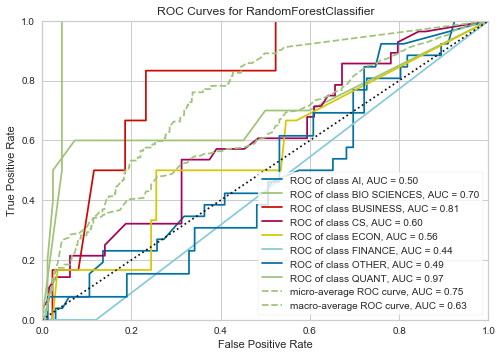

In [42]:
model = RandomForestClassifier()
visualizer = ROCAUC(model, classes=["AI", "BIO SCIENCES", "BUSINESS",'CS','ECON','FINANCE','OTHER','QUANT'])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

<h1>Try to predict gender of student (male, female, intersex or gender fluid, remove data where no answer was given)<h1>

In [43]:
df_cleaned.head()

,What programme are you in?,Have you taken a course on machine learning?,Have you taken a course on information retrieval?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?,Chocolate makes you.....,Did you stand up?
0,AI,yes,0,mu,nee,female,neither,no
1,OTHER,yes,0,mu,nee,male,fat,yes
2,CS,yes,1,mu,ja,male,fat,no
3,BIO SCIENCES,yes,0,unknown,nee,male,neither,no
4,AI,yes,1,mu,ja,male,fat,no


In [44]:
df_cleaned = df_cleaned[df_cleaned["What is your gender?"].str.contains("not willing to answer") == False]

In [45]:
cor_cols = ['What programme are you in?','Have you taken a course on machine learning?','Have you taken a course on information retrieval?','Have you taken a course on statistics?','Have you taken a course on databases?','Chocolate makes you.....','Did you stand up?']

In [46]:
#One-hot encode everything except gender
prefixes = ['Program Type','Taken ML ?', 'Taken Information Retreival?', 'Taken Statistics?', 'Taken Databases?', 'Chocolate Makes You ','Stand up?']
df_start = df_cleaned['What is your gender?']
df_cleaned.drop('What is your gender?',axis = 1, inplace = True)
for i in range(1,len(cor_cols)):
    y = pd.get_dummies(df_cleaned[cor_cols[i]], prefix=prefixes[i])
    df_start = pd.concat([df_start, y], axis=1, join="inner")
df_start.head()
df_gender = df_start
df_gender.head()

,What is your gender?,Taken ML ?_no,Taken ML ?_unknown,Taken ML ?_yes,Taken Information Retreival?_0,Taken Information Retreival?_1,Taken Information Retreival?_unknown,Taken Statistics?_mu,Taken Statistics?_sigma,Taken Statistics?_unknown,...,Taken Databases?_nee,Taken Databases?_unknown,Chocolate Makes You _I have no idea what you are talking about,Chocolate Makes You _fat,Chocolate Makes You _neither,Chocolate Makes You _slim,Chocolate Makes You _unknown,Stand up?_no,Stand up?_unknown,Stand up?_yes
0,female,0,0,1,1,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
1,male,0,0,1,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
2,male,0,0,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,male,0,0,1,1,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
4,male,0,0,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


n=0
for i in range(0,len(df_gender)):
    print(n,df_gender.iloc[i,0])
    n+=1

In [47]:
#Label Encode Gender
le = preprocessing.LabelEncoder()
df_gender['What is your gender?'] = le.fit_transform(df_gender['What is your gender?'])
df_gender.head()

,What is your gender?,Taken ML ?_no,Taken ML ?_unknown,Taken ML ?_yes,Taken Information Retreival?_0,Taken Information Retreival?_1,Taken Information Retreival?_unknown,Taken Statistics?_mu,Taken Statistics?_sigma,Taken Statistics?_unknown,...,Taken Databases?_nee,Taken Databases?_unknown,Chocolate Makes You _I have no idea what you are talking about,Chocolate Makes You _fat,Chocolate Makes You _neither,Chocolate Makes You _slim,Chocolate Makes You _unknown,Stand up?_no,Stand up?_unknown,Stand up?_yes
0,0,0,0,1,1,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
1,3,0,0,1,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
2,3,0,0,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,3,0,0,1,1,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
4,3,0,0,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [48]:
df_model = df_gender.copy()
X2 = df_model.drop(columns = ['What is your gender?']).copy()
y2 = df_model['What is your gender?']
print(len(X2))
print(len(y2))
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, train_size = .7, random_state = 42)
print('X_train2',len(X_train2),X_train2.shape)
print('X_test2', len(X_test2), X_test2.shape)
print('y_train2',len(y_train2),y_train2.shape)
print('y_test2',len(y_test2),y_test2.shape)

292
292
X_train2 204 (204, 20)
X_test2 88 (88, 20)
y_train2 204 (204,)
y_test2 88 (88,)


In [49]:
rf_classifier2 = RandomForestClassifier()
rf_classifier2.fit(X_train2, y_train2)
rf_predictions2 = rf_classifier2.predict(X_test2)
print('Accuracy:')
accuracy_score(y_test2, rf_predictions2,normalize=True, sample_weight=None)

Accuracy:


0.5681818181818182

In [50]:
model = RandomForestClassifier()
visualizer = ROCAUC(model, classes=["female",'gender fluid','intersex','male'])

visualizer.fit(X_train2, y_train2)        # Fit the training data to the visualizer
visualizer.score(X_test2, y_test2)        # Evaluate the model on the test data
visualizer.show()

ValueError: Found input variables with inconsistent numbers of samples: [264, 352]

<h1> Basic (Ridge) Classification to Determine Male or Female <h1>

In [51]:
df_cleaned2.head()

,What programme are you in?,Have you taken a course on machine learning?,Have you taken a course on information retrieval?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?,Chocolate makes you.....,Did you stand up?
0,AI,yes,0,mu,nee,female,neither,no
1,OTHER,yes,0,mu,nee,male,fat,yes
2,CS,yes,1,mu,ja,male,fat,no
3,BIO SCIENCES,yes,0,unknown,nee,male,neither,no
4,AI,yes,1,mu,ja,male,fat,no


In [52]:
df_cleaned2 = df_cleaned2[df_cleaned2["What is your gender?"].str.contains("not willing to answer") == False]
df_cleaned2 = df_cleaned2[df_cleaned2["What is your gender?"].str.contains("intersex") == False]
df_cleaned2 = df_cleaned2[df_cleaned2["What is your gender?"].str.contains("gender fluid") == False]

In [53]:
#One-hot encode everything except gender
prefixes = ['Program Type','Taken ML ?', 'Taken Information Retreival?', 'Taken Statistics?', 'Taken Databases?', 'Chocolate Makes You ','Stand up?']
df_start = df_cleaned2['What is your gender?']
df_cleaned2.drop('What is your gender?',axis = 1, inplace = True)
for i in range(1,len(cor_cols)):
    y = pd.get_dummies(df_cleaned2[cor_cols[i]], prefix=prefixes[i])
    df_start = pd.concat([df_start, y], axis=1, join="inner")
df_start.head()
df_gender2 = df_start
df_gender2.head()

,What is your gender?,Taken ML ?_no,Taken ML ?_unknown,Taken ML ?_yes,Taken Information Retreival?_0,Taken Information Retreival?_1,Taken Information Retreival?_unknown,Taken Statistics?_mu,Taken Statistics?_sigma,Taken Statistics?_unknown,...,Taken Databases?_nee,Taken Databases?_unknown,Chocolate Makes You _I have no idea what you are talking about,Chocolate Makes You _fat,Chocolate Makes You _neither,Chocolate Makes You _slim,Chocolate Makes You _unknown,Stand up?_no,Stand up?_unknown,Stand up?_yes
0,female,0,0,1,1,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
1,male,0,0,1,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
2,male,0,0,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,male,0,0,1,1,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
4,male,0,0,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [54]:
#Label Encode Gender
le = preprocessing.LabelEncoder()
df_gender2['What is your gender?'] = le.fit_transform(df_gender2['What is your gender?'])
df_gender2.head(10)

,What is your gender?,Taken ML ?_no,Taken ML ?_unknown,Taken ML ?_yes,Taken Information Retreival?_0,Taken Information Retreival?_1,Taken Information Retreival?_unknown,Taken Statistics?_mu,Taken Statistics?_sigma,Taken Statistics?_unknown,...,Taken Databases?_nee,Taken Databases?_unknown,Chocolate Makes You _I have no idea what you are talking about,Chocolate Makes You _fat,Chocolate Makes You _neither,Chocolate Makes You _slim,Chocolate Makes You _unknown,Stand up?_no,Stand up?_unknown,Stand up?_yes
0,0,0,0,1,1,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
1,1,0,0,1,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
2,1,0,0,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,1,0,0,1,1,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
4,1,0,0,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,1,0,0,0,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
6,1,0,0,1,1,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
7,1,0,0,1,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
8,1,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
9,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [55]:
df_model = df_gender2.copy()
X = df_gender2.drop(columns = ['What is your gender?']).copy()
y = df_model['What is your gender?']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7)
print(y_train)

25     0
78     0
194    1
241    1
261    0
      ..
144    1
36     1
26     1
303    1
262    0
Name: What is your gender?, Length: 199, dtype: int64


In [56]:
ridge_classifier = RidgeClassifier()
ridge_classifier.fit(X_train, y_train)
ridge_predictions = ridge_classifier.predict(X_test)
print('Accuracy:')
accuracy_score(y_test, ridge_predictions,normalize=True, sample_weight=None)


Accuracy:


0.686046511627907

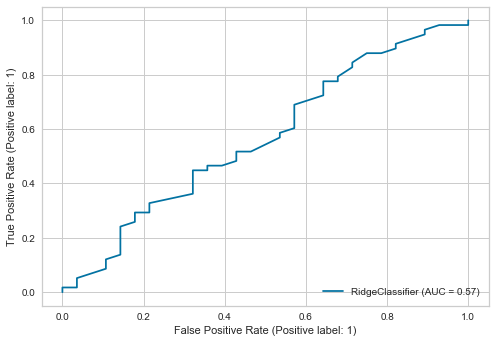

In [57]:
RocCurveDisplay.from_estimator(ridge_classifier,X_test,y_test)